# PyTorch Workflow

Lets explore an example PyTorch end-to-end workflow.

Resources:

- Github notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- Book version of the notebook: https://www.learnpytorch.io/01_pytorch_workflow/
- YouTube video: https://youtu.be/Z_ikDlimN6A


In [1]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting a model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together",
}

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn  # nn contains all PyTorch's building blocks for neural networks

# Check PyTorch version
torch.__version__

'2.2.1+cpu'

## 1. Data (preparing and loading)

Data can be almost anything... in ML.

- Excel spreadsheet (rows and columns)
- Images of any kind
- Videos (YouTube has lots of data...)
- Audio like songs and podcasts
- DNA
- Text

ML is a game of two parts:

1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula _(Y = a + bX) or (Y = mX + c) or (Yi = f(Xi, beta) + ei)_


### Creating a simple dataset using linear regression

We'll use a linear regression formula to make a straight line with known **parameters**. _(parameter - something that a model learns)_


In [3]:
# Create *known* parameters
weight = 0.7  # b
bias = 0.3  # a

# Create a range of numbers
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
# y = mx + c
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting our sata into training and test sets (one of the most important concept in ML)

Let's create a training and test set with our data


In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Building a function to visualize our data


In [5]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

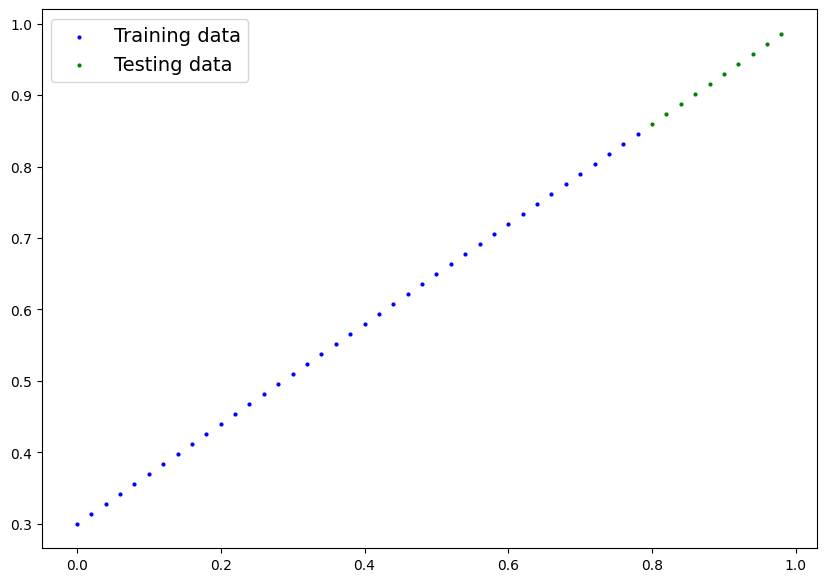

In [6]:
plot_predictions()

## Creating our first PyTorch model for linear regression

we'll be using classes so OOP knowledge will come in handy.
Useful resource for OOP from Real Python: https://realpython.com/python3-object-oriented-programming/

Also, we'll use `nn.Module` a lot, almost everything in PyTorch inherits from `nn.Module`. Its like a building block, it has a lot of helpful in-built things for building PyTorch models.
See PyTorch's documentation.

y = wx + b, where w and b are parameters, b is the bias.

What our model does:

- Start with random values (weight and bias)
- Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:

1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/llg3gGewQ5U
   (3blue1brown videos)


In [7]:
# create linear regression model class


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(
            torch.rand(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    # forward() to define the computation in the model
    def forward(self, x: torch.Tensor):  ## torch.Tensor:  # <- "x" is the inputs data
        return self.weights * x + self.bias

## Breaking down what's happening in our PyTorch linear regression model

5.11.00


### PyTorch essential neural network building modules

- `torch.nn` - contains all of the building for neural networks (computational graphs)
- `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us.
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward`
- `torch.optim` - this's where the optimizers in PyTorch live, (they tell the model parameters stored in `nn.Parameters` how to best change to improve gradient descent and in turn reduce the loss)
- `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

There are also others we'll encounter later:

- `torch.utils.data.Dataset` - Represents a map between key(label) and sample (features) pairs of your data. Such as images and their associated labels.
- `torch.utils.data.Dataloader` - Creates a Python iterable over a `torch Dataset` (allows you to iterate over your data)

See docs, PyTorch cheat sheet: https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking out the internals of our PyTorch model

Now we've created a model, let's see what's inside...

So we ca check our model parameters or what's inside our model using `.parameters()`.


In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

print(model_0, "\n")

# Check out the parameters
print(list(model_0.parameters()))

LinearRegressionModel() 

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]


In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

print(model_0.state_dict())

OrderedDict({'weights': tensor([0.8823]), 'bias': tensor([0.9150])})


We can always came back and re-run the cell above to start a fresh with a new untrained model, or functionalize it.


In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

Out goal is to use backpropagation and gradient descent to adjust the random values(model parameters), to get them as close as possible to the ideal values (weight and bias)

In most cases, we won't know what the ideal values are, but in our case, we know them


In [11]:
# The ideal values
weight, bias

(0.7, 0.3)

## Making predictions with our random model using `torch.inference_mode()`

To check our model's predictve power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.


In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
# Make predictions with model (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

`torch.inference_mode()` turns off gradient tracking (better than `torch.no_grad()`)

Search: x/twitter torch.inference_mode

Thread: https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09lTgw0-rfri6u7PQ

Since the model parameters are untrained (random), the model'spredictions are just random.


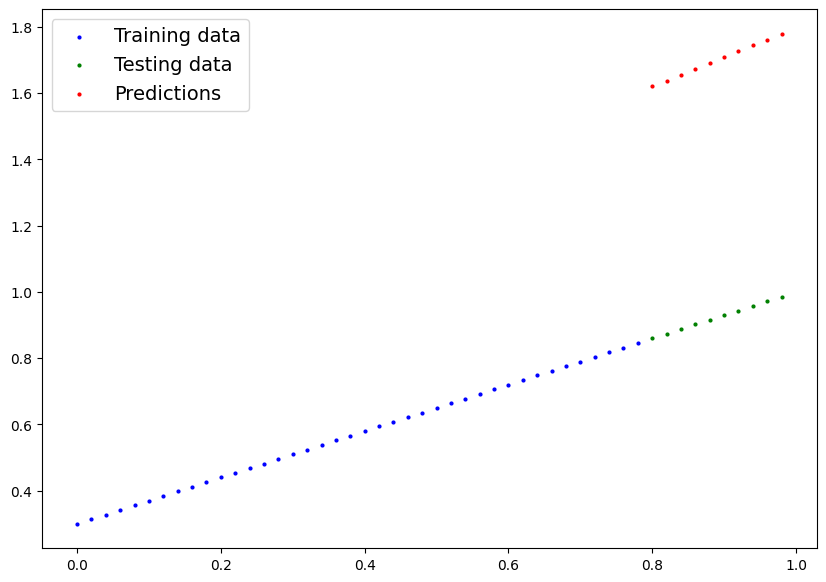

In [14]:
# Let's visualize them
plot_predictions(predictions=y_preds)

## Training a model with PyTorch (intuition building)

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known

Or in other words from a poor representation of the data to a better representation of the data

One way tp measure how poor or how wrong your model's predictions are is to use a loss function.

- Note: **Loss function** may also be called **cost function** or **criterion** in different areas. For our case, we're going to it as a loss function.

Things we need to train:

- **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

  There are many loss functions contained in `torch.nn` (see PyTorch docs on loss functions), Here are a few common ones:

  - L1Loss (Mean Absolute Error), will suffice for refression tasks. Its implemented with `torch.nn.L1Loss` or `torch.mean(torch.abs(y_pred-y_test))`
  - L2Loss (Meas Squares Error)
  - Cross Entropy loss
  - BCELoss (Binary Cross Entropy Loss), mostly for binary classification.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function (minimize loss).
  Its in `torch.optim`.
  Most common ones are: - `Adam` - `SGD` (Stochastic/random Gradient Descent). It starts by randomly adjusting the model's parameters to minimize the loss value.

* Inside the optimizer, you'll often need to set two parameters:

  - `params` - the model parameters you'd like to optimize, e.g. `params=model_0.parameters()`
  - `lr` - the learning rate is a **hyperparameter** that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in larger changes).

    - There is also a concept of lr scheduling, _we reduce the lr as we approach the bottom of the slope_ (convergence)

  - The learning rate tells the optimizer how much to adjust the parameters, the higher the lr, the more the optimizer adjusts the params.

And specifically for PyTorch, we need:

- A training loop
- A testing loop


In [15]:
# model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Setting up a loss function and optimizer with PyTorch


In [16]:
# Setting up a loss function
loss_fn = nn.L1Loss()

# Setting up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [17]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Training loop and Testing loop in PyTorch (steps and intuition)

A couple of things we need in a training loop:

0. Loop through the data. One loop through the data is called an **epoch**. Its a _hyperparameter_ because we set it ourselves.Loop through the data and do...

   1. **Forward pass** (this involves data moving through our model's `forward()` function/functions) to make predictions on data
   2. Calculate the **loss** (compare forward pass predictions to ground truth labels)
   3. Optimizer **zero grad**. Zero the gradients of the optimizer (they accumulate over time by default) _They accumulate every epoch, we zero them to start fresh each forward pass._
   4. **Backpropagation**/Loss backward - move backwards through the network to calculate the gradients (slope, rate of change..., steepness of a hill..) of each of the parameters of the model with respect to the loss. (compute the gradient of every parameter with `require_grad=True`)
   5. **Gradient Descent**/Optimizer step - use the optimizer to adjust our model's parameters to try and minimize the loss

   - by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


Basically...

- **Backpropagation** is calculating the derivative... gradient/slope curves for each of the parameters in the model.

- **Gradient descent** is moving through the gradient curve, stepping through it trying to reach the bottom/convergence. (you can think of it as just from its name, descending on the gradients, or _on a hill, trying to reach the bottom_)


The initial random untrained model parameters:


In [18]:
# Model parameter before training
untrained_params = model_0.state_dict()
untrained_params

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [19]:
torch.manual_seed(42)

# Set number of epochs
epochs = 1

# Training loop
# 0. Loop/Pass the data through the model for a number of epochs
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # sets all params that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the model's params
    loss.backward()

    # 5. Step the optimizer (gradient descent)
    optimizer.step()

Loss: 0.6860889196395874


For some reason, this didn't work, parameters changed even the `untrained_parameters` variable seemed to change (might be a problem with notebooks...)

I wanted to display the change, the untrained parameters and the parameters that have been updated, lol.

we can always refer to the `untrained_parameters` in the cell up before training cell.


In [20]:
# model parameters after training for an epoch above
changed_params = model_0.state_dict()
print(f"initial untrained/random parameters: \n{untrained_params}\n")
print(f"Parameters after training for epochs above: \n{changed_params}")

initial untrained/random parameters: 
OrderedDict({'weights': tensor([0.8784]), 'bias': tensor([0.9050])})

Parameters after training for epochs above: 
OrderedDict({'weights': tensor([0.8784]), 'bias': tensor([0.9050])})


Let's move the training logic into a function we can call throughout


In [21]:
def train(model, inputs, num_epochs, loss_fn, optimizer):
    running_loss = []
    for epoch in range(num_epochs):
        # Setting model to train mode to keep track of gradients
        model.train()

        # Forward pass
        outputs = model(inputs)

        # Calculating loss
        loss = loss_fn(outputs, inputs)
        if num_epochs <= 5:
            # print(f"Loss: {loss}")
            print(f"Loss (Epoch {epoch + 1}): {loss:.4f}")

        # Zero optimizer gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()
        
        # Gradient descent
        optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            running_loss.append(loss.item())
    
    print(f"Running loss: {running_loss}")

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])

Remember, we already defined the `optimizer` and `loss_fn` earlier


In [23]:
torch.manual_seed(42)

epochs = 1

train(
    model=model_0,
    inputs=X_train,
    num_epochs=epochs,
    loss_fn=loss_fn,
    optimizer=optimizer,
)

# Print model stats
current_params = model_0.state_dict()
ground_truth = weight, bias

print(f"\nChanged params:\n{changed_params}\n\nGroung truth:\n{ground_truth}")

Loss (Epoch 1): 0.8576
Running loss: []

Changed params:
OrderedDict({'weights': tensor([0.8745]), 'bias': tensor([0.8950])})

Groung truth:
(0.7, 0.3)


### Seeing Gradient Descent in Action

When we run the above cell, we can see the parameters changing, and the error.

When we run it many times, we can see error reducing and the parameters approaching the `ground_truth`

we can even change the epoch to any number, like 5, 10 ... and we can see how the loss is reducing.


### Make predictions with our model


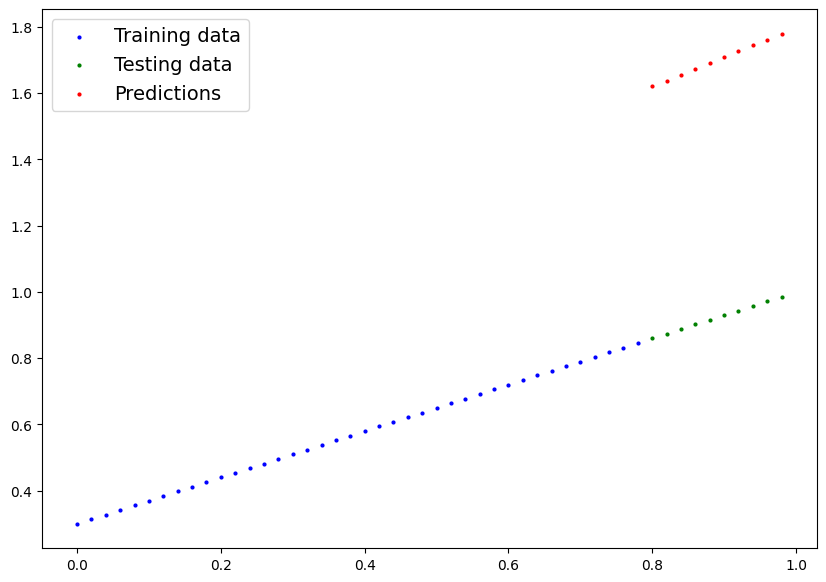

In [24]:
# Previous predictions
plot_predictions(predictions=y_preds)

In [25]:
model_0.eval()
with torch.inference_mode():
    y_preds_new = model_0(X_test)

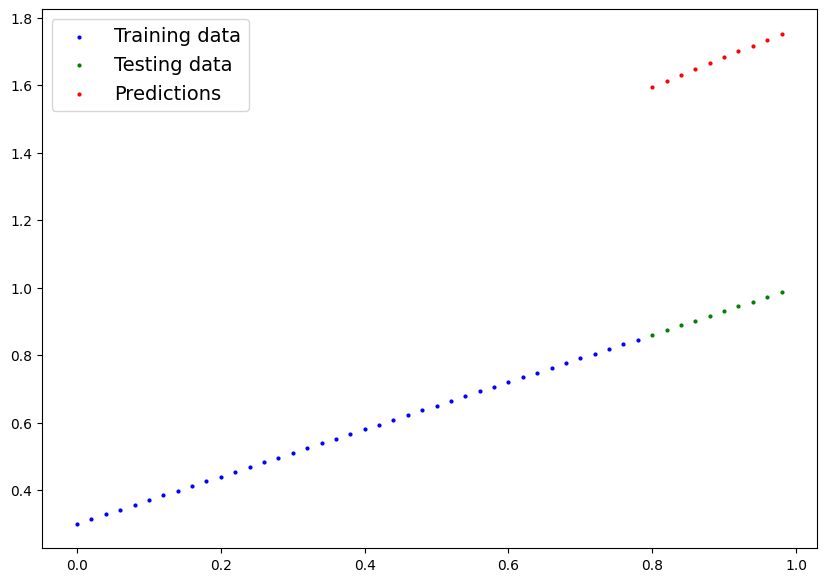

In [26]:
# New predictions
plot_predictions(predictions=y_preds_new)

As you can see, after moderate training, the predictions are near the ground truths

- _Only if you've trained a couple of times, ~15_

try training for 100 epochs and see how it'll hange


In [27]:
torch.manual_seed(42)

epochs = 100

def evaluate_model(n: int=epochs):
    """
    params (n: int) - Takes in number of epochs to train the model for .

    Trains the model for n epochs, as defined in epochs, then prints stats, and plots the predictions.
    """
    train(
        model=model_0,
        inputs=X_train,
        num_epochs=epochs,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )

    # Print model stats
    current_params = model_0.state_dict()
    ground_truth = weight, bias

    print(f"\nChanged params:\n{current_params}\n\nGroung truth:\n{ground_truth}")

    # Evaluate the model
    model_0.eval()
    with torch.inference_mode():
        y_preds_n_epochs = model_0(X_test)

    # New predictions after n epochs
    plot_predictions(predictions=y_preds_n_epochs)

Running loss: [0.7423580884933472, 0.6271482110023499, 0.5119383931159973, 0.396728515625, 0.2815186381340027, 0.16630874574184418, 0.09566082805395126, 0.08086106926202774, 0.07521500438451767, 0.07133916765451431]

Changed params:
OrderedDict({'weights': tensor([0.6495]), 'bias': tensor([0.1525])})

Groung truth:
(0.7, 0.3)


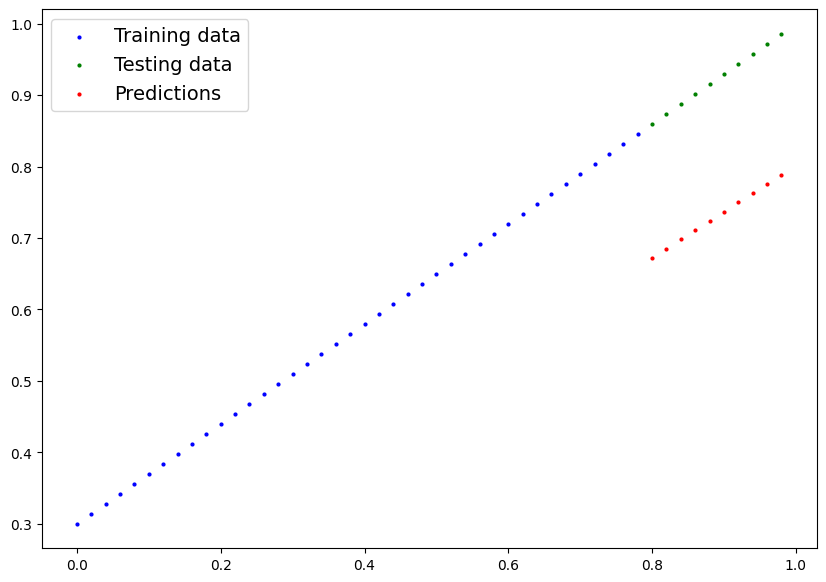

In [28]:
evaluate_model()

### Writing testing loop code

- `model.eval()` - Turns off different settings in the model not needed for evaluation/testing (e.g. Dropout/Batch Norm layers)
- `torch.inference_mode()` - Turns off gradient tracking, (same as `torch.no_grad()` in older PyTorch code), and a couple of more things behing the scenes.
- We still do `forward()` pass.


In [55]:
# Create a random seed
torch.manual_seed(42)

# Instantiate a new model
model_1 = LinearRegressionModel()

print(model_1.state_dict())

OrderedDict({'weights': tensor([0.8823]), 'bias': tensor([0.9150])})


In [67]:
# Setting up a loss function
loss_fn_1 = nn.L1Loss()

# Setting up an optimizer
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [68]:
# Setup empty lists to keep track of model progress
epoch_count = []
train_loss_values = []
test_loss_values = []

# wipe values in the list above clean
def wipe_values_clean():
    pass

In [58]:
torch.manual_seed(42)

def train_test_evaluate(model=model_1, train_inputs_data=X_train, train_output_data=y_train, test_inputs_data=X_test, test_output_data=y_test, num_epochs=1, loss_fn=loss_fn_1, optimizer=optimizer_1, plot=True):

    for epoch in range(num_epochs):
        # Setting model to train mode to keep track of gradients
        model.train()

        # Forward pass
        predictions = model(train_inputs_data)

        # Calculating loss
        loss = loss_fn(predictions, train_output_data)

        # Zero optimizer gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()
        
        # Gradient descent
        optimizer.step()
        
        # Evaluate/test the model
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model(test_inputs_data)

            # 2. Calculate test loss
            test_loss = loss_fn(test_pred, test_output_data)

        # Logging (Print out what's happening and update the value lists)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.item())
            test_loss_values.append(test_loss.item())
            print(f"Epoch: {epoch} | MAE Loss: {loss} | MAE Test loss: {test_loss}")
            # print model weights
            print(model.state_dict())
    # print Ground truth
    print(f"Ground Truth -> [ weight: {weight} | Bias: {bias} ]")

    # Plot presictions with test data
    if plot:
        plot_predictions(predictions=test_pred)

During logging, we add `.item()` to the losses to append them to the lists as `float` data type, instead of `torch.tensors` which doesn't work well with matplotlib (we'd have to add `.detach().numpy()`)


In [32]:
# Train, Test and Evaluate for 1 epoch
# train_test_evaluate()

We'll train the model for longer(100 epochs) and his time plot the predictions against train and test data


In [33]:
# Train, Test and Evaluate for 100 epochs
# train_test_evaluate(num_epochs=100, plot=True)

The ultimate goal is to get the red dots(predictions) to match the green dots(test data, unseen during training)


Epoch: 0 | MAE Loss: 0.11004672944545746 | MAE Test loss: 0.10233600437641144
OrderedDict({'weights': tensor([0.6869]), 'bias': tensor([0.4140])})
Epoch: 10 | MAE Loss: 0.09852589666843414 | MAE Test loss: 0.08886518329381943
OrderedDict({'weights': tensor([0.6830]), 'bias': tensor([0.4040])})
Epoch: 20 | MAE Loss: 0.08700504153966904 | MAE Test loss: 0.07539437711238861
OrderedDict({'weights': tensor([0.6791]), 'bias': tensor([0.3940])})
Epoch: 30 | MAE Loss: 0.07548420131206512 | MAE Test loss: 0.0619235523045063
OrderedDict({'weights': tensor([0.6752]), 'bias': tensor([0.3840])})
Epoch: 40 | MAE Loss: 0.06396336108446121 | MAE Test loss: 0.04845272749662399
OrderedDict({'weights': tensor([0.6713]), 'bias': tensor([0.3740])})
Epoch: 50 | MAE Loss: 0.052442509680986404 | MAE Test loss: 0.03498192876577377
OrderedDict({'weights': tensor([0.6674]), 'bias': tensor([0.3640])})
Epoch: 60 | MAE Loss: 0.040921665728092194 | MAE Test loss: 0.021511107683181763
OrderedDict({'weights': tensor([

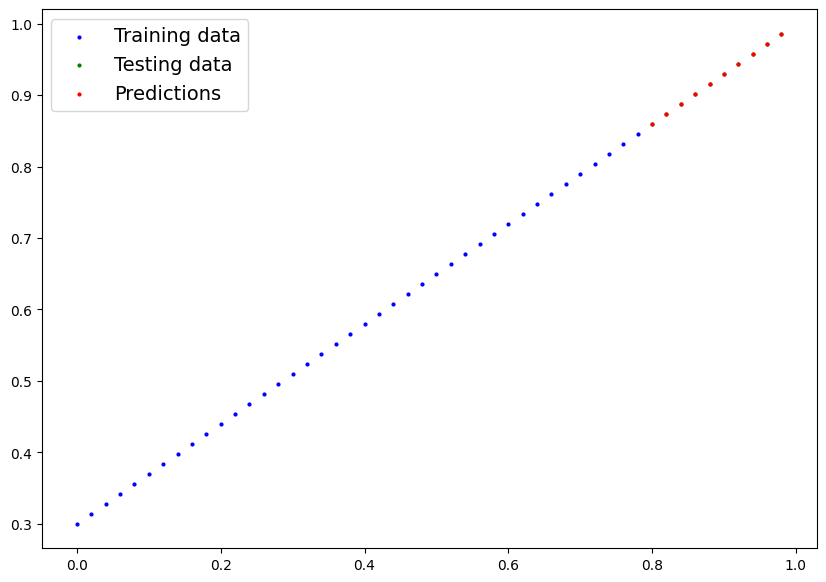

In [69]:
train_test_evaluate(num_epochs=500)

In [36]:
# print([val.dtype() for val in (epoch_count[1:], train_loss_values[1:], test_loss_values[1:])])

In [70]:
print([val for val in epoch_count[:5]])
print([type(val) for val in epoch_count[:5]])

[0, 10, 20, 30, 40]
[<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [71]:
print([val for val in train_loss_values[:2]])
print([type(val) for val in train_loss_values[:2]])

[0.11004672944545746, 0.09852589666843414]
[<class 'float'>, <class 'float'>]


In [72]:
print([val for val in test_loss_values[:2]])
print([type(val) for val in test_loss_values[:2]])

[0.10233600437641144, 0.08886518329381943]
[<class 'float'>, <class 'float'>]


In [74]:
# Train and Test loss curve using the values
def plot_loss_curve(epochs=epoch_count, train_losses=train_loss_values, test_losses=test_loss_values):
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.title("Training and Test Loss Curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

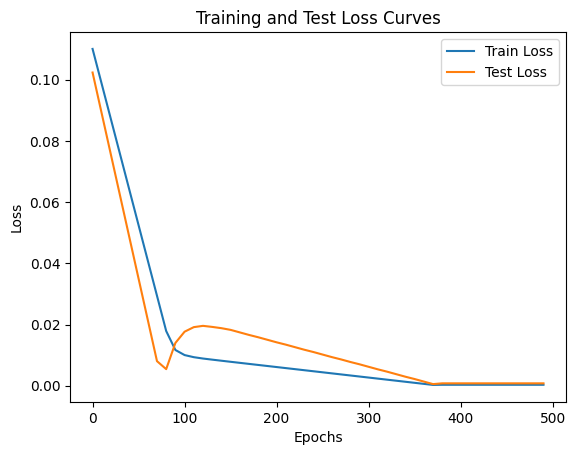

In [75]:
plot_loss_curve()

## Saving a Model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - Allows you to save a PyTorch object in Python's **pickle** format.
2. `torch.load()` - Allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - Allows you to load a model's saved state dictionary.
   - Since the model is a sub-class of `torch.nn.Module`, we can call the `load_state_dict()` directly.

See Docs - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

Also if on colab, search how to save model in drive


In [89]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow.pth


In [83]:
# ls -l models

## Loading a PyTorch model

Since we saved only the model's parameters, `state_dict()` rather than whole model (`torch.save()`), we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [90]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])

In [91]:
# 1. Instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModel()

# 2. Load the saved state dict of our model_1 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [92]:
# The model_1 parameters are exactly same as loaded_model_1 parameters
loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])

In [94]:
# Making some predictions with the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_predictions = loaded_model_1(X_test)

loaded_model_predictions

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [98]:
# Predictions with original model_1
model_1.eval()
with torch.inference_mode():
    original_model_preds = model_1(X_test)

original_model_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [99]:
# Compare original model preds with loaded model preds
original_model_preds == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Some Bugs I Encountered

- When I instantiated a new model (`model_1`), I forgot to instantiate a new optimizer for it, used the old one for `model_0` (and in optimizers we pass `model.parameters()` and `learning rate`) so with the wrong model parameters, optimizer won't do sh\*t.

  Got flat parallel train test curves and constant train and test loss values(Why Logging and Visualization are important).

  - Rectified it by instantiating a new optimizer and passing new model params.

- Passed wrong data .At some point, confused in between X_train, y_train and X_test, y_test data.

  - That's why I went with deliberate naming `(train_inputs_data, train_outputs_data, test_inputs_data, test_outputs_data)`.

- When Visualizing/plotting the train and test loss curves, encountered typeErrors where matplotlib works only with numpy arrays or Python's native data types and not PyTorch's `torch.tensor()`. The `train_test_evaluate()` loop appended values of type`torch.tensor()` to the `train and test loss values` lists.

  - Remedied this by adding `.item()` after loss value, which will convert it to Python native dtypes like `float`.

- Also some typos here and there.


# Putting it all together

Let's go back through the steps above and see it all in one place


In [32]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.2.1+cpu'

### Device agnostic code

Can work on both "CPU" and "GPU" for fast computing incase have access to a GPU e.g. custom or on colab or kaggle.

Default to `cpu` and `cuda` (GPU) only if its available.


In [33]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Using Device: {device}")

Using Device: cpu


In [34]:
# if have a gpu, to chech type and specs
# !nvidia-smi

## Preparing Data

Create some data using linear regression formula `y = mX + c` same as **y = weight \* X + bias**, where X = features(inputs) and y = target(labels/outputs).


In [49]:
# Data with y = weight * X + bias
weight2 = 0.7
bias2 = 0.3

ground_truth_2 = {"weight_2": weight2, "bias_2": bias2}

# range
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X2 = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y2 = weight2 * X2 + bias2

X2[:10], y2[:10], len(X2), X2.shape, y2.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

In [50]:
ground_truth_2

{'weight_2': 0.7, 'bias_2': 0.3}

In [51]:
# Split data
train_split_2 = int(0.8 * len(X2))

X2_train, y2_train = X2[:train_split_2], y2[:train_split_2] # 80% each
X2_test, y2_test = X2[train_split_2:], y2[train_split_2:]   # 40% each

len(X2_train), len(y2_train), len(X2_test), len(y2_test), len(X2), len(y2)

(40, 40, 10, 10, 50, 50)

In [52]:
# rebuilding the function to plot data and predictions
def plot_predictions_2(
    train_data=X2_train,
    train_labels=y2_train,
    test_data=X2_test,
    test_labels=y2_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.show()

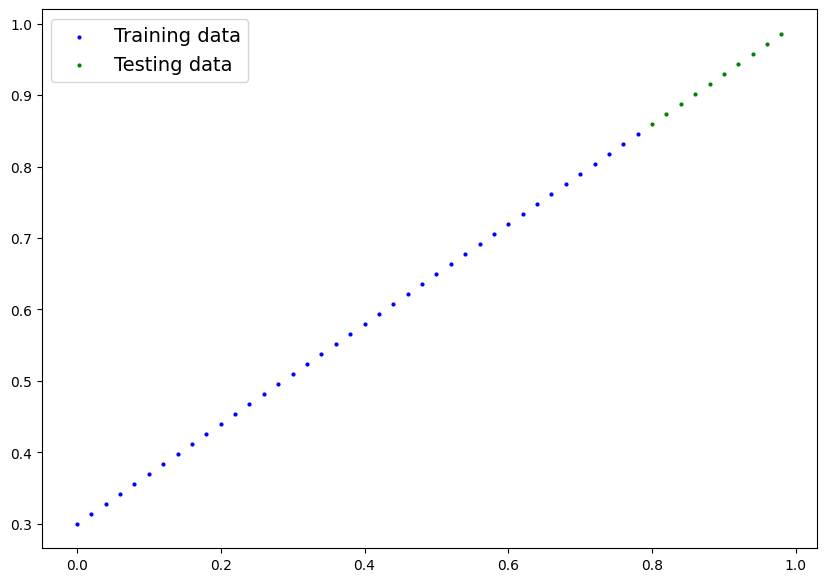

In [53]:
# plot the data
plot_predictions_2()

## Building a PyTorch Linear Model

This time we'll create a linear model by subclassing `nn.Modude`

The `in_features` and `out_features` are going to be highly dependent on the dimensionality of the training data and labels, in our case, **X2**/X2_train and **y2**/y2_train, which is `[50, 1]`, 1 column.


In [54]:
# Creating a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Using nn.Linear for creating model parameters (weight and bias)
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [55]:
# set manual seed
torch.manual_seed(42)

# Create model instance
model_2 = LinearRegressionModelV2()

# view model and its parameters
print(model_2)
print(model_2.state_dict())

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})


In [56]:
# Check the model current device
next(model_2.parameters()).device

device(type='cpu')

In [57]:
# Set model to use target device, just incase we have a gpu or we use colab
model_2.to(device)
next(model_2.parameters()).device

device(type='cpu')

## Training

For training we need:

- Loss Function
- Optimizer
- Training Loop
- Testing Loop


In [61]:
# Set up loss function
loss_fn_2 = nn.L1Loss() # Mean Absolute Error

# Set up optimizer
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

# Manual seed
torch.manual_seed(42)

# Lists for logging the values
epoch_count_2 = []
train_loss_values_2 = []
test_loss_values_2 = []

# We're also adding data to target device to avoid errors where model and data are not in the same davice incase we're using colab GPU.

def train_test_2(epochs, ground_truth_2=ground_truth_2, model=model_2,train_data=X2_train.to(device), train_targets=y2_train.to(device), test_data=X2_test.to(device), test_targets=y2_test.to(device), optimizer=optimizer_2, loss_fn=loss_fn_2, plot=True):
    """Train model for n number of epochs"""
    # Training Loop
    for epoch in range(epochs):
        ## Train loop
        model.train()
        # Forward pass
        train_preds_2 = model(train_data)
        # Calculating Loss
        loss_2 = loss_fn(train_preds_2, train_targets)
        # zeroing optimizer gradients
        optimizer.zero_grad()
        # Backpropagation
        loss_2.backward()
        # Gradient descent
        optimizer.step()

        ## Test loop
        model.eval()
        with torch.inference_mode():
            # Forward pass
            test_preds_2 = model(test_data)
            # Loss
            test_loss_2 = loss_fn(test_preds_2, test_targets)
        
        # Logging
        if epoch % (epochs * 0.2) == 0: # At every 20% epoch of total epochs
            print(f"\nEpoch: {epoch}")
            epoch_count_2.append(epoch)
            print(f"Train loss: {loss_2}")
            train_loss_values_2.append(loss_2.item())
            print(f"Test loss: {test_loss_2}")
            test_loss_values_2.append(test_loss_2.item())
            
    if plot:
        plot_predictions_2(predictions=test_preds_2)

    print("Training and Eval complete")
    print(f"Model parameters: {model.state_dict()}")
    print(f"Ground Truth: {ground_truth_2}")


Epoch: 0
Train loss: 0.5551779866218567
Test loss: 0.5739762187004089

Epoch: 40
Train loss: 0.09433844685554504
Test loss: 0.03513689711689949

Epoch: 80
Train loss: 0.013089170679450035
Test loss: 0.029944902285933495

Epoch: 120
Train loss: 0.0012645035749301314
Test loss: 0.013801807537674904

Epoch: 160
Train loss: 0.0012645035749301314
Test loss: 0.013801807537674904


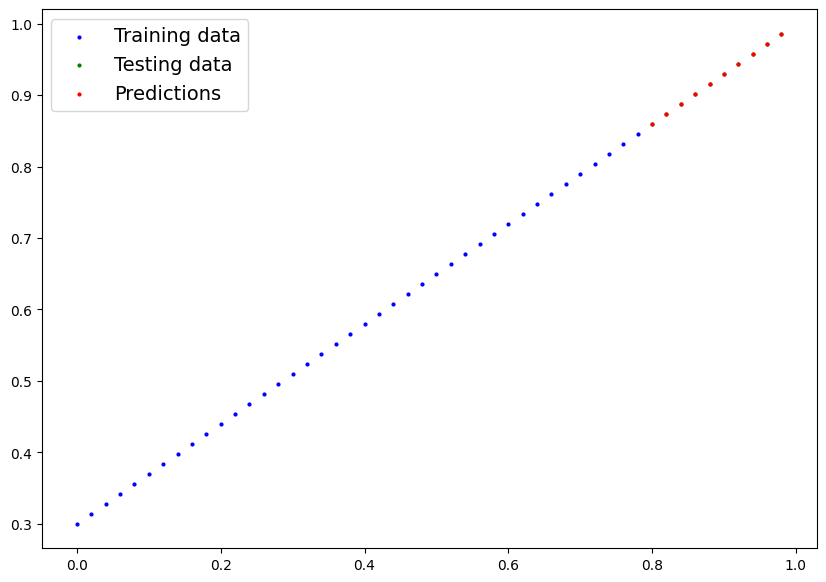

Training and Eval complete
Model parameters: OrderedDict({'linear_layer.weight': tensor([[0.6968]]), 'linear_layer.bias': tensor([0.3025])})
Ground Truth: {'weight_2': 0.7, 'bias_2': 0.3}


In [62]:
# Train for 200 epochs
num_epochs_2 = 200

train_test_2(epochs=num_epochs_2)

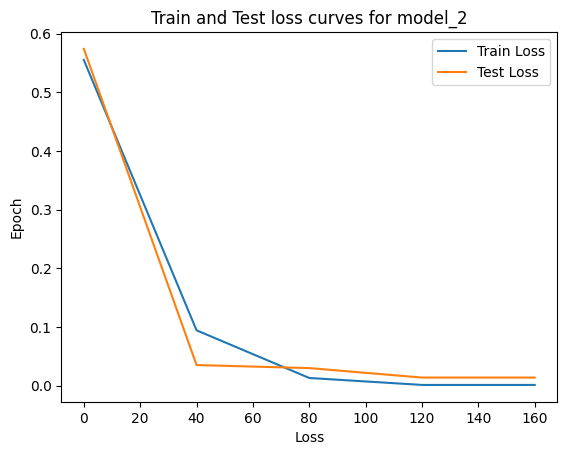

In [63]:
# Plot train and test loss curves
def plot_loss_curves_2(epochs=epoch_count_2, train_losses=train_loss_values_2, test_losses=test_loss_values_2):
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    plt.title("Train and Test loss curves for model_2")
    plt.ylabel("Epoch")
    plt.xlabel("Loss")
    plt.legend()
    plt.show()

# plotting
plot_loss_curves_2()

### If the model predictions are satisfying, we can proceed to save the model

In [64]:
# Saving the model
from pathlib import Path

# 1. Create models directory, skip if it exists
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_2.pth
